<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.831739,54.088410,56.940707,153.082259,372.943116,329.070412,43.872704
1,0.0,1.0,92.368432,54.417595,80.930925,-643.089605,-405.372653,-68.289687,-337.082967
2,0.0,2.0,40.873277,34.966290,50.540075,-210.730283,-74.350641,285.948667,-360.299308
3,0.0,3.0,80.080872,87.470134,68.635057,383.666487,629.852549,-59.969507,689.822056
4,0.0,4.0,38.946210,24.154879,60.392864,21.566955,155.060908,170.330453,-15.269545
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.608643,64.033531,94.964032,-181.332360,40.273845,-438.665689,478.939534
29996,999.0,26.0,84.055700,93.484229,44.001586,-472.381672,-240.840157,203.750101,-444.590258
29997,999.0,27.0,59.240935,56.288646,89.370058,-213.578453,1.321185,-308.324012,309.645197
29998,999.0,28.0,86.201728,28.363611,68.616905,-178.577625,14.604619,189.878393,-175.273774


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.831739,54.088410,56.940707,153.082259,372.943116,329.070412,43.872704
1,0.0,1.0,92.368432,54.417595,80.930925,-643.089605,-405.372653,-68.289687,-337.082967
2,0.0,2.0,40.873277,34.966290,50.540075,-210.730283,-74.350641,285.948667,-360.299308
3,0.0,3.0,80.080872,87.470134,68.635057,383.666487,629.852549,-59.969507,689.822056
4,0.0,4.0,38.946210,24.154879,60.392864,21.566955,155.060908,170.330453,-15.269545
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.608643,64.033531,94.964032,-181.332360,40.273845,-438.665689,478.939534
29996,999.0,26.0,84.055700,93.484229,44.001586,-472.381672,-240.840157,203.750101,-444.590258
29997,999.0,27.0,59.240935,56.288646,89.370058,-213.578453,1.321185,-308.324012,309.645197
29998,999.0,28.0,86.201728,28.363611,68.616905,-178.577625,14.604619,189.878393,-175.273774


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.831739  54.088410  56.940707   153.082259   372.943116   
      1.0    92.368432  54.417595  80.930925  -643.089605  -405.372653   
      2.0    40.873277  34.966290  50.540075  -210.730283   -74.350641   
      3.0    80.080872  87.470134  68.635057   383.666487   629.852549   
      4.0    38.946210  24.154879  60.392864    21.566955   155.060908   
...                ...        ...        ...          ...          ...   
999.0 25.0   52.608643  64.033531  94.964032  -181.332360    40.273845   
      26.0   84.055700  93.484229  44.001586  -472.381672  -240.840157   
      27.0   59.240935  56.288646  89.370058  -213.578453     1.321185   
      28.0   86.201728  28.363611  68.616905  -178.577625    14.604619   
      29.0   79.839104  95.154603  85.870040 -1324.819750 -1053.956003   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    329.070412   43.872704  
      1.0    -68.289687 -337.082967  
      2.0    285.948667 -360.299308  
      3.0    -59.969507  689.822056  
      4.0    170.330453  -15.269545  
...                 ...         ...  
999.0 25.0  -438.665689  478.939534  
      26.0   203.750101 -444.590258  
      27.0  -308.324012  309.645197  
      28.0   189.878393 -175.273774  
      29.0  -250.846338 -803.109664  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.831739  54.088410  56.940707   153.082259   372.943116   
      1.0    92.368432  54.417595  80.930925  -643.089605  -405.372653   
      2.0    40.873277  34.966290  50.540075  -210.730283   -74.350641   
      3.0    80.080872  87.470134  68.635057   383.666487   629.852549   
      4.0    38.946210  24.154879  60.392864    21.566955   155.060908   
...                ...        ...        ...          ...          ...   
999.0 25.0   52.608643  64.033531  94.964032  -181.332360    40.273845   
      26.0   84.055700  93.484229  44.001586  -472.381672  -240.840157   
      27.0   59.240935  56.288646  89.370058  -213.578453     1.321185   
      28.0   86.201728  28.363611  68.616905  -178.577625    14.604619   
      29.0   79.839104  95.154603  85.870040 -1324.819750 -1053.956003   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    329.070412   43.872704  
      1.0    -68.289687 -337.082967  
      2.0    285.948667 -360.299308  
      3.0    -59.969507  689.822056  
      4.0    170.330453  -15.269545  
...                 ...         ...  
999.0 25.0  -438.665689  478.939534  
      26.0   203.750101 -444.590258  
      27.0  -308.324012  309.645197  
      28.0   189.878393 -175.273774  
      29.0  -250.846338 -803.109664  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.831739,54.088410,56.940707,153.082259,372.943116,329.070412,43.872704
1,0.0,1.0,92.368432,54.417595,80.930925,-643.089605,-405.372653,-68.289687,-337.082967
2,0.0,2.0,40.873277,34.966290,50.540075,-210.730283,-74.350641,285.948667,-360.299308
3,0.0,3.0,80.080872,87.470134,68.635057,383.666487,629.852549,-59.969507,689.822056
4,0.0,4.0,38.946210,24.154879,60.392864,21.566955,155.060908,170.330453,-15.269545
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.608643,64.033531,94.964032,-181.332360,40.273845,-438.665689,478.939534
29996,999.0,26.0,84.055700,93.484229,44.001586,-472.381672,-240.840157,203.750101,-444.590258
29997,999.0,27.0,59.240935,56.288646,89.370058,-213.578453,1.321185,-308.324012,309.645197
29998,999.0,28.0,86.201728,28.363611,68.616905,-178.577625,14.604619,189.878393,-175.273774


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.831739  54.088410  56.940707   153.082259   372.943116   
      1.0    92.368432  54.417595  80.930925  -643.089605  -405.372653   
      2.0    40.873277  34.966290  50.540075  -210.730283   -74.350641   
      3.0    80.080872  87.470134  68.635057   383.666487   629.852549   
      4.0    38.946210  24.154879  60.392864    21.566955   155.060908   
...                ...        ...        ...          ...          ...   
999.0 25.0   52.608643  64.033531  94.964032  -181.332360    40.273845   
      26.0   84.055700  93.484229  44.001586  -472.381672  -240.840157   
      27.0   59.240935  56.288646  89.370058  -213.578453     1.321185   
      28.0   86.201728  28.363611  68.616905  -178.577625    14.604619   
      29.0   79.839104  95.154603  85.870040 -1324.819750 -1053.956003   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    329.070412   43.872704  
      1.0    -68.289687 -337.082967  
      2.0    285.948667 -360.299308  
      3.0    -59.969507  689.822056  
      4.0    170.330453  -15.269545  
...                 ...         ...  
999.0 25.0  -438.665689  478.939534  
      26.0   203.750101 -444.590258  
      27.0  -308.324012  309.645197  
      28.0   189.878393 -175.273774  
      29.0  -250.846338 -803.109664  

[30000 rows x 7 columns]

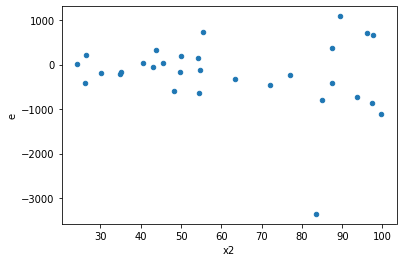

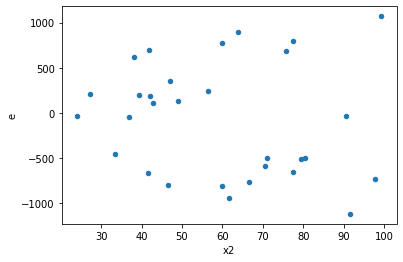

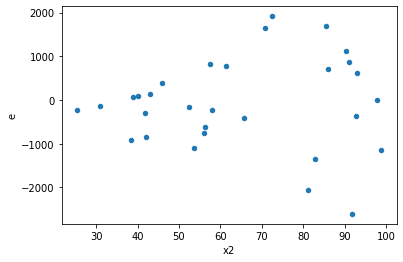

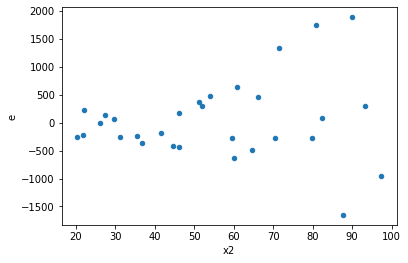

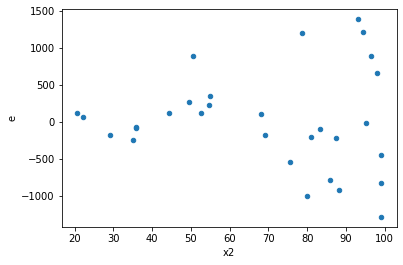

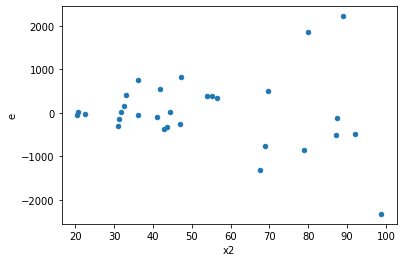

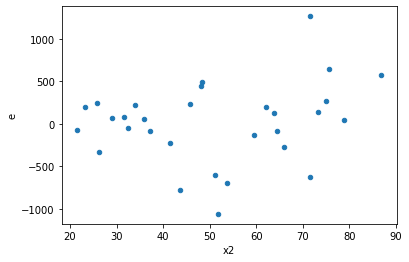

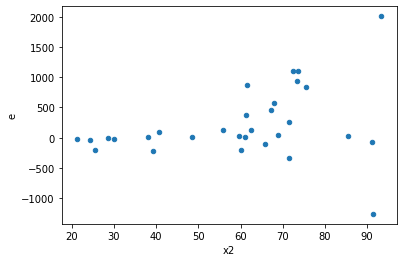

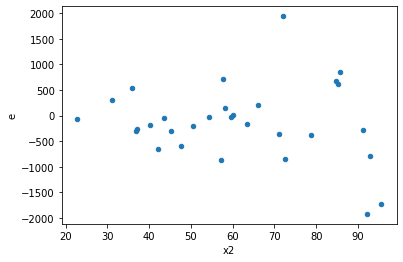

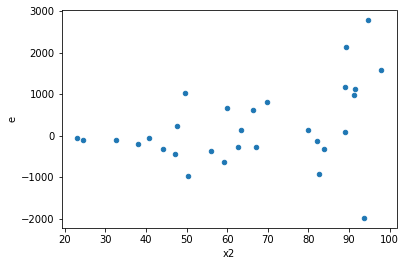

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,9.0,9.0,673002.7341902765,11999014.402214281,74778.08157669738,1333223.8224682536,17.829072294410366,0.00020793420085851722,0.9998960328995707,0.00010396710042925861,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,3889024.048388767,4099517.9126627166,432113.78315430746,455501.9902958574,1.0541251125359221,0.9387025756661298,0.5306487121669351,0.4693512878330649,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,389563.34486679407,2020261.4982560882,43284.81609631045,224473.49980623202,5.185964041218738,0.022212790784236214,0.9888936046078819,0.011106395392118107,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,67770.82086833974,5549452.596175408,7530.091207593305,616605.8440194898,81.88557442673573,2.9772929854843255e-07,0.9999998511353507,1.4886464927421628e-07,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,2272369.1213382604,4881704.791829442,252485.45792647338,542411.6435366046,2.1482886499331024,0.27008412803461,0.864957935982695,0.135042064017305,Reject001=1 : Homoscedasticity
9.0,9.0,9.0,2314228.938494274,11416241.186150983,257136.548721586,1268471.2429056647,4.933064744051998,0.026207676520694,0.986896161739653,0.013103838260347,Reject001=1 : Homoscedasticity
10.0,9.0,9.0,1397402.0327373291,3588196.4611936705,155266.8925263699,398688.4956881856,2.5677624456899206,0.1762820277571413,0.9118589861214293,0.08814101387857065,Reject001=1 : Homoscedasticity
11.0,9.0,9.0,2802471.1838900917,18704916.432326302,311385.6870988991,2078324.0480362559,6.674436668555546,0.009309307455693583,0.9953453462721532,0.004654653727846791,Reject001=0 : Heteroscedasticity
17.0,9.0,9.0,2397287.7759957793,2829205.6546611893,266365.30844397546,314356.18385124323,1.1801693910052167,0.8091217287247532,0.5954391356376234,0.4045608643623766,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,5784423.032564408,2221066.8550899522,642713.6702849342,246785.20612110582,0.3839737935116559,0.1700983616727463,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,4789270.87174417,2824146.9814073113,532141.2079715744,313794.1090452568,0.5896820324089971,0.4434885080702061,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,12784522.31172432,2657167.9394443175,1420502.47908048,295240.8821604797,0.207842567336873,0.028439712985504215,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,673002.7341902765,11999014.402214281,74778.08157669738,1333223.8224682536,17.829072294410366,0.00020793420085851722,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,3889024.048388767,4099517.9126627166,432113.78315430746,455501.9902958574,1.0541251125359221,0.9387025756661298,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,15932652.299266223,1455859.2556174851,1770294.6999184692,161762.1395130539,0.09137582546030548,0.0014702649771633758,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,389563.34486679407,2020261.4982560882,43284.81609631045,224473.49980623202,5.185964041218738,0.022212790784236214,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,67770.82086833974,5549452.596175408,7530.091207593305,616605.8440194898,81.88557442673573,2.9772929854843255e-07,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,2272369.1213382604,4881704.791829442,252485.45792647338,542411.6435366046,2.1482886499331024,0.27008412803461,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      693
Reject001=0 : Heteroscedasticity    307
Name: Result_test, dtype: int64